In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


In [ ]:

data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


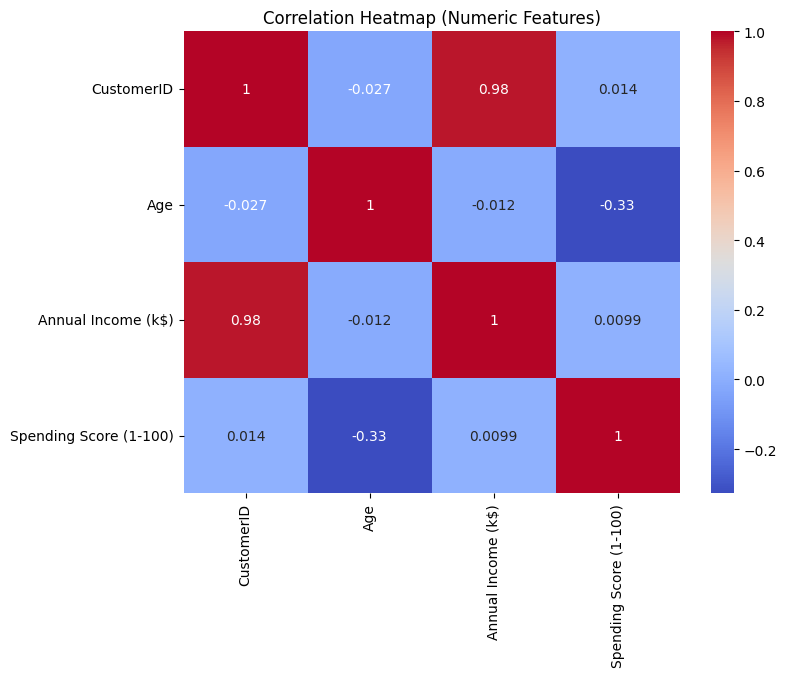

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [ ]:
X = data.iloc[:, [3, 4]].values  


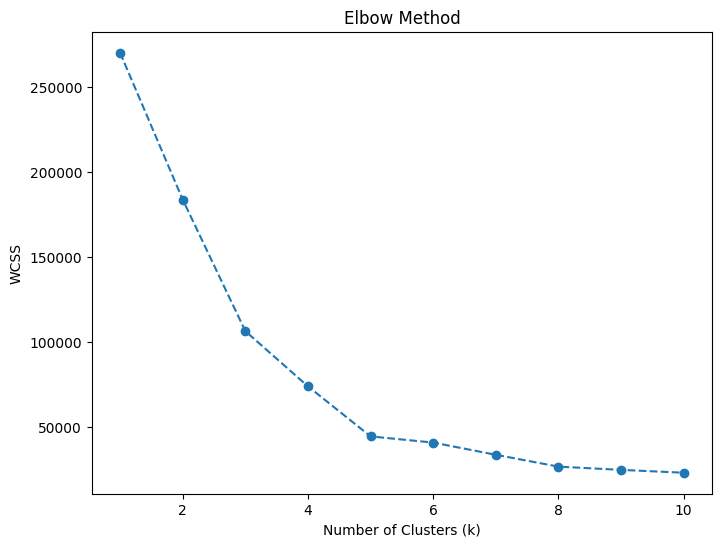

In [16]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster info to dataset
data["Cluster"] = y_kmeans


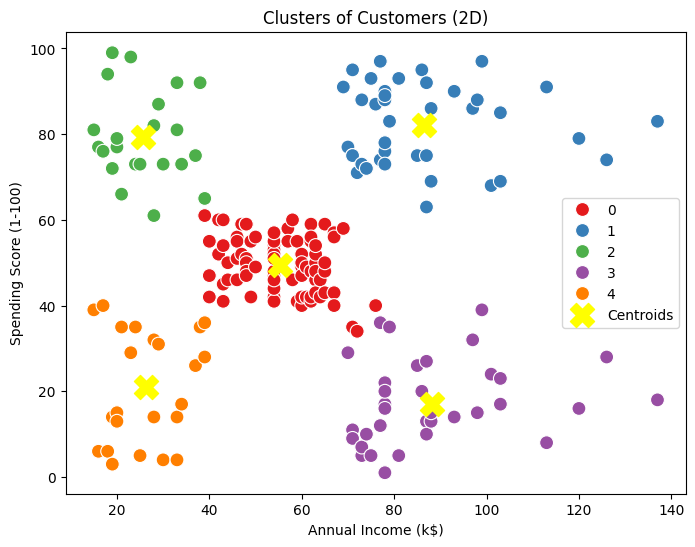

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_kmeans, palette="Set1", s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=300, c='yellow', marker='X', label='Centroids')
plt.title("Clusters of Customers (2D)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


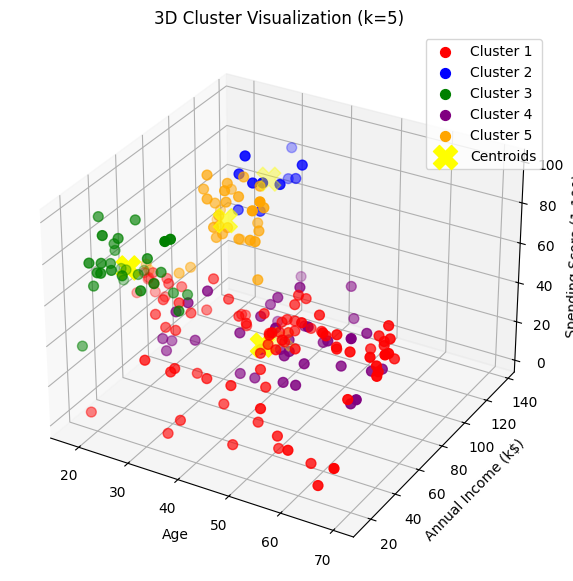

In [18]:
X3 = data.iloc[:, [2, 3, 4]].values  # Age, Income, Spending Score

kmeans3 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans3 = kmeans3.fit_predict(X3)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    ax.scatter(X3[y_kmeans3==i,0], X3[y_kmeans3==i,1], X3[y_kmeans3==i,2],
               s=50, c=colors[i], label=f'Cluster {i+1}')

ax.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], kmeans3.cluster_centers_[:,2], 
           s=300, c='yellow', marker='X', label='Centroids')

ax.set_title("3D Cluster Visualization (k=5)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.legend()
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

score_2d = silhouette_score(X, y_kmeans)
score_3d = silhouette_score(X3, y_kmeans3)

print(f"Silhouette Score (2D Clustering, k=5): {score_2d:.3f}")
print(f"Silhouette Score (3D Clustering, k=5): {score_3d:.3f}")


Silhouette Score (2D Clustering, k=5): 0.554
Silhouette Score (3D Clustering, k=5): 0.358
